## One hot encoding with SVMs

In this short notebook we use one hot encoding to enable the inclusion of categorical predictors in the `heart` dataset. This dataset comprisies binary outcomes for heart diseases (`AHD`) among 303 patients presenting with chest pain. There are 13 predictors, three of which are categorical (`Sex`, `ChestPain` and `Thal` [Thallium stress test]).  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv("heart.csv")
heart[heart.isnull().any(axis=1)]
heart.dropna(inplace=True)

In [8]:
heart.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Note that sex is already encoded as binary (0 = female, 1 = male) and so we don't need to worry about encoding it numerically.

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In contrast, `ChestPain` consists of four categorical levels (asymptomatic, nonanginal, nontypical, typical), and `Thal` consists of three categorical levels (normal, reversible, fixed).

In [5]:
print(heart.ChestPain.value_counts())
print(heart.Thal.value_counts())

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64
normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64


Before we go proceed with one hot encoding of these two predictors let's fit a linear SVM excluding `ChestPain` and `Thal`.

In [11]:
X = heart.iloc[:,np.r_[0:2,3:12]] #np.r_: concatenate
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63,1,145,233,1,2,150,0,2.3,3,0.0
1,67,1,160,286,0,2,108,1,1.5,2,3.0
2,67,1,120,229,0,2,129,1,2.6,2,2.0
3,37,1,130,250,0,0,187,0,3.5,3,0.0
4,41,0,130,204,0,2,172,0,1.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,2,0.0
298,45,1,110,264,0,0,132,0,1.2,2,0.0
299,68,1,144,193,1,0,141,0,3.4,2,2.0
300,57,1,130,131,0,0,115,1,1.2,2,1.0


In [9]:
np.r_[0:2,3:12] # No column [2] - ChestPain and column [13] - AHD

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [12]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
y = heart["AHD"]
y

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
297    Yes
298    Yes
299    Yes
300    Yes
301    Yes
Name: AHD, Length: 297, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)

In [15]:
from sklearn.svm import SVC
heart_svm = SVC(kernel='linear', C=10)
heart_svm.fit(X_train, y_train)

SVC(C=10, kernel='linear')

Evaluate performance on the training and the test data

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
predictions = heart_svm.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

          No       0.80      0.83      0.81        98
         Yes       0.82      0.80      0.81       100

    accuracy                           0.81       198
   macro avg       0.81      0.81      0.81       198
weighted avg       0.81      0.81      0.81       198



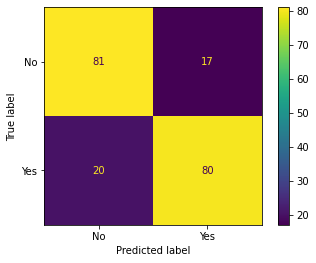

In [17]:
ConfusionMatrixDisplay.from_predictions(y_train, predictions)

In [19]:
predictions = heart_svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.90      0.89      0.89        62
         Yes       0.82      0.84      0.83        37

    accuracy                           0.87        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.87      0.87      0.87        99



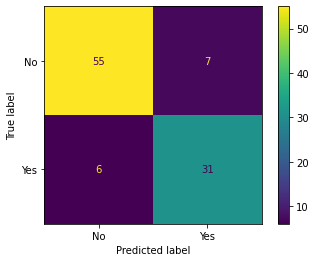

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [21]:
from sklearn.model_selection import cross_val_score, KFold
lin_score = cross_val_score(heart_svm, X_scaled, y, cv=KFold(n_splits = 5, shuffle=True))
lin_score

array([0.9       , 0.73333333, 0.81355932, 0.74576271, 0.77966102])

In [22]:
round(np.mean(lin_score), 3)

0.794

### This time with one hot encoding

A simple way to one hot encode categorical precictors is to use the pandas function `get_dummies`. The nice thing about `get_dummies` is that it can be applied to the whole data frame of predictors but will only transfor those predictors whose Dtype is object.

In [16]:
y = heart["AHD"]
X = pd.get_dummies(heart.loc[:,heart.columns != "AHD"])

Take a look at the new dataframe predictors, instead of a single column for each of `ChestPain` anf `Thal` we now have four and three columns respectively, corresponding to each individual level in each predictor.

In [17]:
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0,0,0,1
298,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)

In [19]:
heart_svm = SVC(kernel='linear', C=10)
heart_svm.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
predictions = heart_svm.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

          No       0.88      0.93      0.90       105
         Yes       0.92      0.85      0.88        93

    accuracy                           0.89       198
   macro avg       0.90      0.89      0.89       198
weighted avg       0.90      0.89      0.89       198



In [21]:
predictions = heart_svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85        55
         Yes       0.85      0.75      0.80        44

    accuracy                           0.83        99
   macro avg       0.83      0.82      0.82        99
weighted avg       0.83      0.83      0.83        99



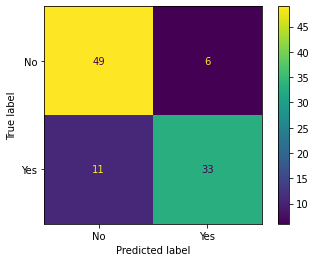

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [23]:
from sklearn.model_selection import cross_val_score, KFold
lin_score = cross_val_score(heart_svm, X_scaled, y, cv=KFold(n_splits = 5, shuffle=True))
lin_score

array([0.85      , 0.81666667, 0.84745763, 0.88135593, 0.74576271])

In [24]:
round(np.mean(lin_score), 3)

0.828

One-hot encoding of `ChestPain` and `Thal` gains us another ~3-4% accuracy on the test data.